## Data Analysis & Visualization

### Warm-up

In [ ]:
import pandas as pd

customers = [
    ["Sam", "2016", 3, 256],
    ["Jayden", "2017", 4, 129],
    ["Noah", "2015", 2, 87],
]

col_names = ["name", "customer_since", "store_visits", "amount_spent"]
df_cust = pd.DataFrame(customers, columns=col_names)

df_cust.set_index("name", inplace=True)
df_cust

,customer_since,store_visits,amount_spent
name,,,
Sam,2016,3,256
Jayden,2017,4,129
Noah,2015,2,87


### Importing Data in Google Colab

In [ ]:
import pandas as pd
import requests
from io import StringIO

orig_url = (
    "https://drive.google.com/file/d/1Z1V2I7ep85G_0kcwOcTjMnoFUCm-KE4H/view?usp=sharing"
)

file_id = orig_url.split("/")[-2]
dwn_url = "https://drive.google.com/uc?export=download&id=" + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
dfs = pd.read_csv(csv_raw)
dfs.head()

,Unnamed: 0,Date/Time,Lat,Lon,Base
0,0,7/1/2014 0:03:00,40.7586,-73.9706,B02512
1,1,7/1/2014 0:05:00,40.7605,-73.9994,B02512
2,2,7/1/2014 0:06:00,40.7320,-73.9999,B02512
3,3,7/1/2014 0:09:00,40.7635,-73.9793,B02512


### Importing Data from a URL

In [ ]:
import pandas as pd

data_url = "http://bit.ly/2cLzoxH"

# Create the dataframe from the url
gm = pd.read_csv(data_url)
gm.head()

# Get a statistical summary
gm.describe()

,year,pop,lifeExp,gdpPercap
count,1704.00000,1.704000e+03,1704.000000,1704.000000
mean,1979.50000,2.960121e+07,59.474439,7215.327081
std,17.26533,1.061579e+08,12.917107,9857.454543
min,1952.00000,6.001100e+04,23.599000,241.165876
25%,1965.75000,2.793664e+06,48.198000,1202.060309
50%,1979.50000,7.023596e+06,60.712500,3531.846988
75%,1993.25000,1.958522e+07,70.845500,9325.462346
max,2007.00000,1.318683e+09,82.603000,113523.132900


In [ ]:
import math

# say we want the most recent data, we can find out the maximum year
print(max(gm["year"]))

# filter rows for the year 2007 using the boolean value gm['year']==2007
gm_07 = gm[gm["year"] == 2007]
print(gm_07.shape)  # recall, this tells us the dimensions
gm_07.head()

2007
(142, 6)


,country,year,pop,continent,lifeExp,gdpPercap
11,Afghanistan,2007,31889923.0,Asia,43.828,974.580338
23,Albania,2007,3600523.0,Europe,76.423,5937.029526
35,Algeria,2007,33333216.0,Africa,72.301,6223.367465
47,Angola,2007,12420476.0,Africa,42.731,4797.231267
59,Argentina,2007,40301927.0,Americas,75.320,12779.379640


### Filtering and Sorting

In [ ]:
gm_07_sort = gm_07.sort_values(["lifeExp"], ascending=False)
gm_07_sort.head()

In [ ]:
import math

# say we want the most recent data, we can find out the maximum year
print(max(gm["year"]))

# filter rows for the year 2007 using the boolean value gm['year']==2007
gm_07 = gm[gm["year"] == 2007]
print(gm_07.shape)  # recall, this tells us the dimensions
gm_07.head()

### Using Apply Function

In [ ]:
# print(gm_07.describe(),'\n')

mean_gdp = gm_07["gdpPercap"].mean()
print("Mean GDP is: ", round(mean_gdp))

Mean GDP is:  11680


In [ ]:
# Create a function that returns a 1 if a number is <11680
def below_mean(num):
    if num < 11680:
        return 1
    else:
        return 0


gm_under_mean = gm_07["gdpPercap"].apply(below_mean)
gm_07.loc[:, "gdpBelowMean"] = gm_under_mean
# gm_07['gdpBelowMean'] = gm_under_mean  # -> deprecated

gm_07

,country,year,pop,continent,lifeExp,gdpPercap,gdpBelowMean
11,Afghanistan,2007,31889923.0,Asia,43.828,974.580338,1
23,Albania,2007,3600523.0,Europe,76.423,5937.029526,1
35,Algeria,2007,33333216.0,Africa,72.301,6223.367465,1
47,Angola,2007,12420476.0,Africa,42.731,4797.231267,1
59,Argentina,2007,40301927.0,Americas,75.320,12779.379640,0
...,...,...,...,...,...,...,...
1655,Vietnam,2007,85262356.0,Asia,74.249,2441.576404,1
1667,West Bank and Gaza,2007,4018332.0,Asia,73.422,3025.349798,1
1679,Yemen Rep.,2007,22211743.0,Asia,62.698,2280.769906,1
1691,Zambia,2007,11746035.0,Africa,42.384,1271.211593,1


In [ ]:
# What percent of countries have gdp below the mean?
pct = round(sum(gm_07["gdpBelowMean"]) / gm_07["gdpBelowMean"].count() * 100)
print(f"Percentage of countries with GDP below the mean: {pct}%")

Percentage of countries with GDP below the mean: 67%


### Pivot Table

In [ ]:
df_07 = gm_07[["continent", "lifeExp"]]
df_07

,continent,lifeExp
11,Asia,43.828
23,Europe,76.423
35,Africa,72.301
47,Africa,42.731
59,Americas,75.320
...,...,...
1655,Asia,74.249
1667,Asia,73.422
1679,Asia,62.698
1691,Africa,42.384


In [ ]:
print(gm_07.shape)
print(df_07.shape)

# create a pivot table that summarizes the life expectancy by continent using the mean (default)
pd.pivot_table(df_07, values="lifeExp", columns="continent")

(142, 7)
(142, 2)


continent,Africa,Americas,Asia,Europe,Oceania
lifeExp,54.806038,73.60812,70.728485,77.6486,80.7195


In [53]:
# select three columns from gapminder dataframe
df_07 = gm_07[["continent", "year", "lifeExp"]]
# pivot table example with three columns
pd.pivot_table(df_07, values="lifeExp", index=["year"], columns="continent")

continent,Africa,Americas,Asia,Europe,Oceania
year,,,,,
2007,54.806038,73.60812,70.728485,77.6486,80.7195


In [ ]:
pd.pivot_table(
    gm_07, values="lifeExp", index="year", columns="continent", aggfunc="mean"
)

continent,Africa,Americas,Asia,Europe,Oceania
year,,,,,
2007,54.806038,73.60812,70.728485,77.6486,80.7195


### Data Visualization

#### Basic Plots

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

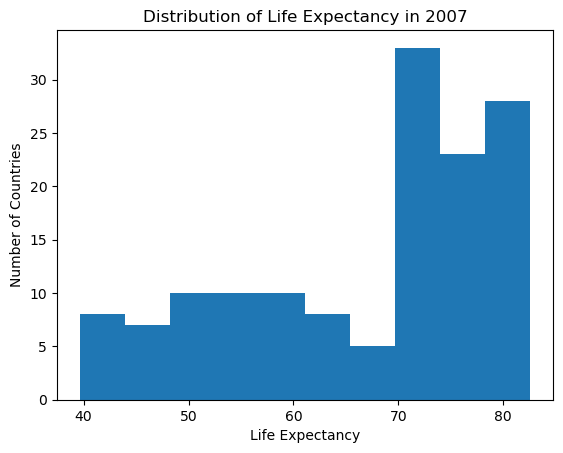

In [ ]:
plt.hist(gm_07["lifeExp"])
plt.xlabel("Life Expectancy")
plt.ylabel("Number of Countries")
plt.title("Distribution of Life Expectancy in 2007")
plt.show()

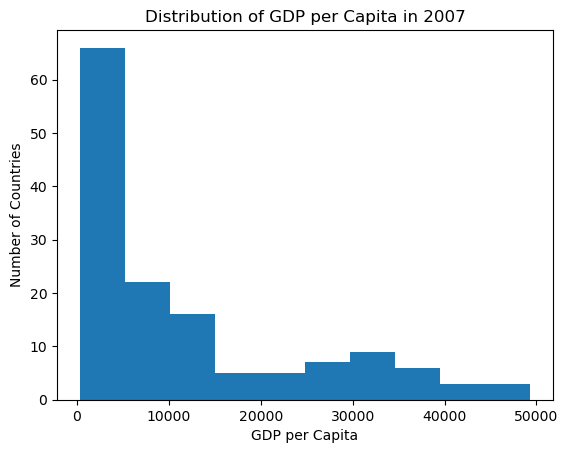

In [ ]:
plt.hist(gm_07["gdpPercap"])
plt.xlabel("GDP per Capita")
plt.ylabel("Number of Countries")
plt.title("Distribution of GDP per Capita in 2007")
plt.show()

In [ ]:
gm_france = gm[gm["country"] == "France"]
print(gm_france.shape)
gm_france

(12, 6)


,country,year,pop,continent,lifeExp,gdpPercap
528,France,1952,42459667.0,Europe,67.410,7029.809327
529,France,1957,44310863.0,Europe,68.930,8662.834898
530,France,1962,47124000.0,Europe,70.510,10560.485530
531,France,1967,49569000.0,Europe,71.550,12999.917660
532,France,1972,51732000.0,Europe,72.380,16107.191710
533,France,1977,53165019.0,Europe,73.830,18292.635140
534,France,1982,54433565.0,Europe,74.890,20293.897460
535,France,1987,55630100.0,Europe,76.340,22066.442140
536,France,1992,57374179.0,Europe,77.460,24703.796150
537,France,1997,58623428.0,Europe,78.640,25889.784870


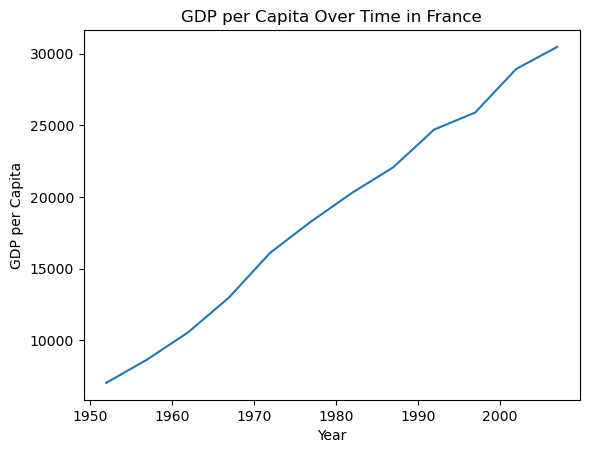

In [ ]:
plt.plot(gm_france["year"], gm_france["gdpPercap"])
plt.xlabel("Year")
plt.ylabel("GDP per Capita")
plt.title("GDP per Capita Over Time in France")
plt.show()

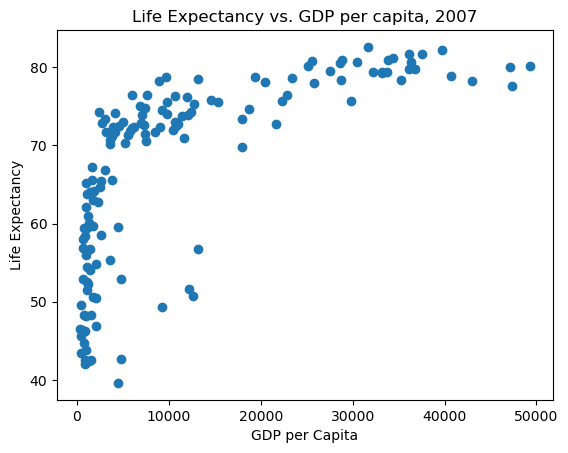

In [ ]:
# Create the scatterplot using the scatter() function
plt.scatter(gm_07["gdpPercap"], gm_07["lifeExp"])

# Add some labels and title
plt.title("Life Expectancy vs. GDP per capita, 2007")
plt.xlabel("GDP per Capita")
plt.ylabel("Life Expectancy")
plt.show()

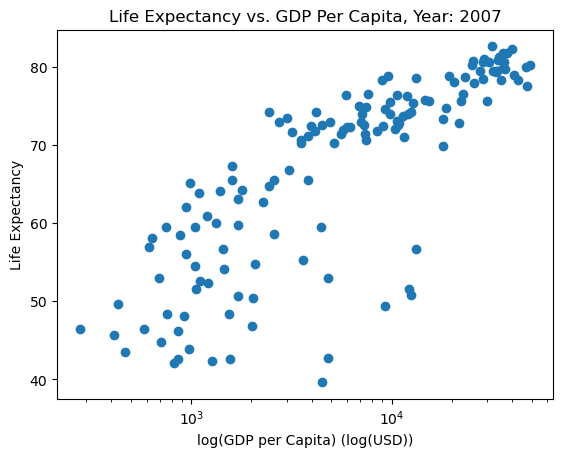

In [ ]:
# create the scatterplot in the same way as above
plt.scatter(gm_07["gdpPercap"], gm_07["lifeExp"])

# adjust the x-axis to a log scale
plt.xscale("log")

# add some labels and a title
plt.xlabel("log(GDP per Capita) (log(USD))")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy vs. GDP Per Capita, Year: 2007")
plt.show()

#### Bubble Chart (Optional)


Because our data set has several variables, it might make sense to look at some ways to visualize some of the other factors that may contribute to our understanding of the phenomenon.  Namely, we can represent population as the size of the dots in the scatterplot.  We can represent continent with different colors.  Check out [Color Maps in matplotlib](https://matplotlib.org/tutorials/colors/colormaps.html).  The following example comes from this amazing [Python Gaph Gallary](https://python-graph-gallery.com/341-python-gapminder-animation/).  Take some time to look it over.  The data we are using in this example can be found at [gapminderData.csv](https://python-graph-gallery.com/wp-content/uploads/gapminderData.csv).  The gapminder visualization is also a great one to take a look at: [gapminder visualization](https://www.gapminder.org/tools/#$state$time$value=1819;;&chart-type=bubbles)

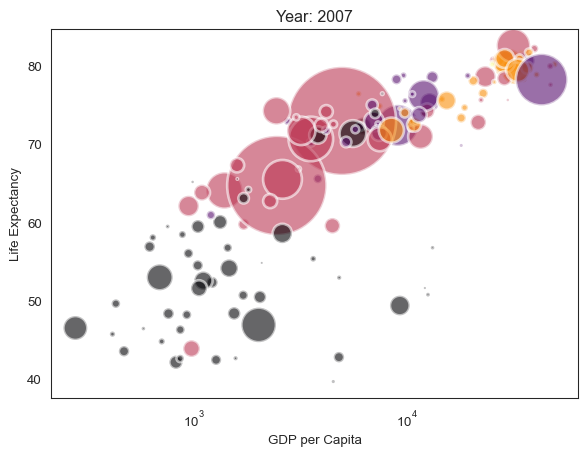

In [ ]:
# libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

sns.set_style("white")
import pandas as pd

my_dpi = 96

# Get the data (csv file is hosted on the web)
url = "https://python-graph-gallery.com/wp-content/uploads/gapminderData.csv"
data = gm

# And I need to transform my categorical column (continent) in a numerical value group1->1, group2->2...
data["continent"] = pd.Categorical(data["continent"])

# initialize a figure
fig = plt.figure(figsize=(680 / my_dpi, 480 / my_dpi), dpi=my_dpi)

# Change color with c and alpha. I map the color to the X axis value.
tmp = data[data.year == 2007]
plt.scatter(
    tmp["gdpPercap"],
    tmp["lifeExp"],
    s=tmp["pop"] / 200000,
    c=tmp["continent"].cat.codes,
    cmap="inferno",
    alpha=0.6,
    edgecolors="white",
    linewidth=2,
)

# Add titles (main and on axis)
plt.xscale("log")
plt.ylabel("Life Expectancy")
plt.xlabel("GDP per Capita")
plt.title("Year: 2007")
plt.show()

#### Regression Analysis

In [ ]:
from scipy import stats
import numpy as np

# make sure the independent variable is the log of gdpPercap
x = np.log(gm_07["gdpPercap"])
# specify the dependent variable as life expectancy
y = gm_07["lifeExp"]

# use the linregress() function to generate the linear model (least squares regression)
lm = stats.linregress(x, y)
print(lm)

# customize the output referencing the linear model
print("Slope: ", lm.slope, "Intercept: ", lm.intercept)
print("Correlation: ", lm.rvalue)
print("R-squared", lm.rvalue**2)
print("p-value", lm.pvalue)

LinregressResult(slope=np.float64(7.202801571010749), intercept=np.float64(4.949611651060771), rvalue=np.float64(0.8089802514849211), pvalue=np.float64(4.115370000558001e-34), stderr=np.float64(0.4423393345070953), intercept_stderr=np.float64(3.857684111534346))
Slope:  7.202801571010749 Intercept:  4.949611651060771
Correlation:  0.8089802514849211
R-squared 0.6544490472926062
p-value 4.115370000558001e-34


**Interpreting Output**

The regression output helps us quantify the relationship between the variables and evaluate the model as far as it's usefulness in predicting Life Expectancy from GDP.  The p-value suggests that the linear relationship is statistically significant (unlikely to happen by chance alone).  The R-squared values tells us that the linear model predicting Life Expectancy from GDP explains 65% of the variation in Life Expectancy.  In general, low p-value, high R-squared provides strong validation that the model is appropriate and meaningful for these data.  

### Exercise: Data Analysis with Stocks

This exercise can be fairly open-ended.  The goal here is to implement some of the tools we have been working with thoughout this lesson and perhaps try some new methods based on your interests or by reading up on the attributes and methods described in the pandas documentation.  Here is a link to the stock symbols,
[Stock Symbols](http://www.eoddata.com/symbols.aspx?AspxAutoDetectCookieSupport=1).  The example uses datareader to pull data on a particular stock during a specified time-frame.  Go ahead and make changes to suit your interests.

In [ ]:
# import supporting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# for extracting live stock data
import yfinance as yf

# in order to specify start date and end date we need datetime package
import datetime as dt

# startDate , as per our convenience we can modify
startDate = dt.datetime(2019, 5, 31)

# endDate , as per our convenience we can modify
endDate = dt.datetime(2021, 1, 30)
amzn = yf.Ticker("AMZN")

# pass the parameters as the taken dates for start and end
amzn_data = amzn.history(start=startDate, end=endDate)

# use the describe function to generate a statistical summary
amzn_data.describe()

# percentage of days the stock closed higher than it opened
amzn_data["Up"] = np.where(amzn_data["Close"] > amzn_data["Open"], 1, 0)
amzn_data.head(3)
amzn_data["Up"].sum() / amzn_data["Up"].count()


# Read about the pct_change() function and think about how you can apply it to these data
amzn_data["Close"].pct_change()

# Try plotting the percent change over time
plt.plot(amzn_data["Close"])

amzn_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Up
Date,,,,,,,,
2019-05-31 00:00:00-04:00,89.500504,89.779503,88.635002,88.753502,92376000,0.0,0.0,0
2019-06-03 00:00:00-04:00,88.000504,88.314499,83.599998,84.634499,181974000,0.0,0.0,0
2019-06-04 00:00:00-04:00,84.961998,86.541000,84.044502,86.477997,113582000,0.0,0.0,1
2019-06-05 00:00:00-04:00,87.480003,87.599998,85.762497,86.925003,84796000,0.0,0.0,0
2019-06-06 00:00:00-04:00,86.885498,88.000000,86.306503,87.718002,73786000,0.0,0.0,1


### Exporting Data to Google Drive

In [ ]:
# from google.colab import drive
# drive.mount('drive')

# amzn.to_csv('amzn.csv')
# !cp amzn.csv "drive/My Drive/"

## Exercise:

### Problem 1:  Importing data and creating a data frame 

In [ ]:
def gm_data(data_source):
    import pandas as pd

    # a. Import the data and create a dataframe
    gm = pd.read_csv(data_source).round(decimals=2)
    print(gm, "\n")

    # c.  Sort the data frame by decreasing life expectancy
    gm_sorted = gm.sort_values("lifeExp", ascending=False)
    print(gm_sorted)


data_url = "http://bit.ly/2cLzoxH"
gm_data(data_url)

          country  year         pop continent  lifeExp  gdpPercap
0     Afghanistan  1952   8425333.0      Asia    28.80     779.45
1     Afghanistan  1957   9240934.0      Asia    30.33     820.85
2     Afghanistan  1962  10267083.0      Asia    32.00     853.10
3     Afghanistan  1967  11537966.0      Asia    34.02     836.20
4     Afghanistan  1972  13079460.0      Asia    36.09     739.98
...           ...   ...         ...       ...      ...        ...
1699     Zimbabwe  1987   9216418.0    Africa    62.35     706.16
1700     Zimbabwe  1992  10704340.0    Africa    60.38     693.42
1701     Zimbabwe  1997  11404948.0    Africa    46.81     792.45
1702     Zimbabwe  2002  11926563.0    Africa    39.99     672.04
1703     Zimbabwe  2007  12311143.0    Africa    43.49     469.71

[1704 rows x 6 columns] 

              country  year          pop continent  lifeExp  gdpPercap
803             Japan  2007  127467972.0      Asia    82.60   31656.07
671   Hong Kong China  2007    6980412.

### Problem 2:  Filtering, Summarizing, and Visualizing Distributions


         year           pop  lifeExp  gdpPercap
count   142.0  1.420000e+02   142.00     142.00
mean   2002.0  4.145759e+07    65.69    9917.85
std       0.0  1.408483e+08    12.28   11154.11
min    2002.0  1.703720e+05    39.19     241.17
25%    2002.0  4.173506e+06    55.52    1409.57
50%    2002.0  1.037292e+07    70.83    5319.80
75%    2002.0  2.654556e+07    75.46   13359.51
max    2002.0  1.280400e+09    82.00   44683.98


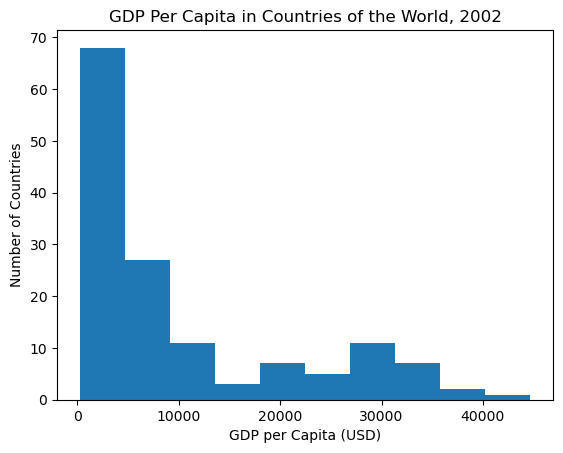

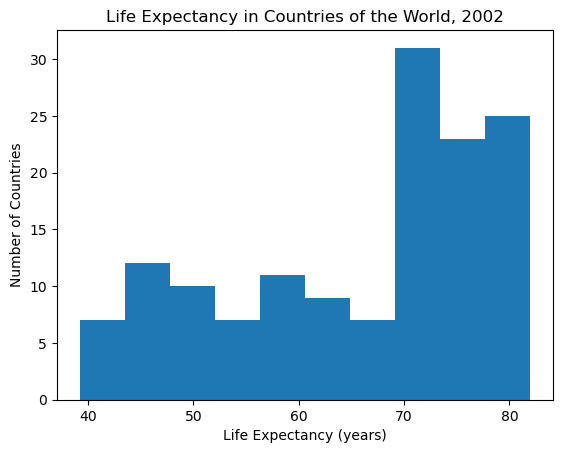

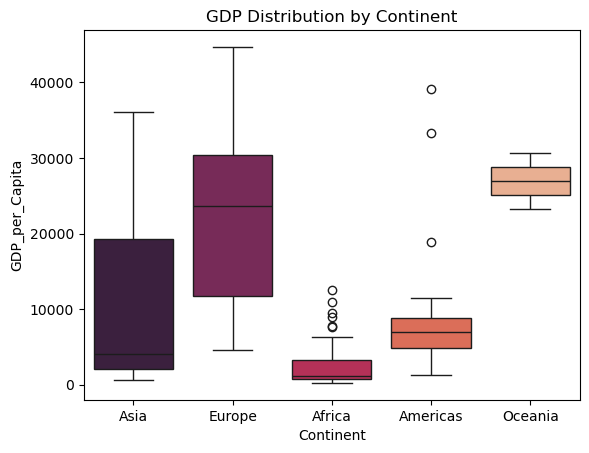

In [ ]:
def exploring_data(data_source, y):
    import pandas as pd
    import matplotlib.pyplot as plt

    # %matplotlib inline
    import seaborn as sns

    # import the data as a dataframe called gm
    gm = pd.read_csv(data_source)

    # a.  Select data from year y
    gm_y = gm[gm["year"] == int(y)]

    # b.  Find a statistical summary of the data from selected year
    summary = gm_y.describe().round(decimals=2)
    print(summary)

    # c.  Create one histogram for GDP and one for Life Expectancy
    gdp_hist = plt.hist(gm_y["gdpPercap"])
    # plt.title('GDP Per Capita in Countries of the World, %d'%y)
    plt.title(f"GDP Per Capita in Countries of the World, {y}")
    plt.xlabel("GDP per Capita (USD)")
    plt.ylabel("Number of Countries")
    plt.show()

    exp_hist = plt.hist(gm_y["lifeExp"])
    # plt.title('Life Expectancy in Countries of the World, %s'%y)
    plt.title(f"Life Expectancy in Countries of the World, {y}")
    plt.xlabel("Life Expectancy (years)")
    plt.ylabel("Number of Countries")
    plt.show()

    # d.  Create parallel boxplots to show the distributions of GDP within each continent
    sns.boxplot(
        x="continent", y="gdpPercap", data=gm_y, palette="rocket", hue="continent"
    )
    plt.title("GDP Distribution by Continent")
    plt.xlabel("Continent")
    plt.ylabel("GDP_per_Capita")
    plt.show()


# Run the function on the following data
data_url = "http://bit.ly/2cLzoxH"
exploring_data(data_url, 2002)

### Problem 3:  Pivot Table
Create a pivot table that summarizes the gdp by year (rows) and continent (columns) based on an aggregating function such as median, maximum, etc. The function should accept the data source and the aggregating function as arguments.


In [ ]:
def pivot_table(data_source, opp):
    import pandas as pd

    gm = pd.read_csv(data_source)

    # Create a dataframe with the columns continent, year, and gdpPercap
    df = gm[["continent", "year", "gdpPercap"]]
    print(df)

    pt = pd.pivot_table(
        df, values="gdpPercap", index="year", columns="continent", aggfunc=opp
    ).round(decimals=2)

    return pt


# Run the function on the following data
data_url = "http://bit.ly/2cLzoxH"
operation = "median"
pivot_table(data_url, operation)

     continent  year   gdpPercap
0         Asia  1952  779.445314
1         Asia  1957  820.853030
2         Asia  1962  853.100710
3         Asia  1967  836.197138
4         Asia  1972  739.981106
...        ...   ...         ...
1699    Africa  1987  706.157306
1700    Africa  1992  693.420786
1701    Africa  1997  792.449960
1702    Africa  2002  672.038623
1703    Africa  2007  469.709298

[1704 rows x 3 columns]


continent,Africa,Americas,Asia,Europe,Oceania
year,,,,,
1952,987.03,3048.30,1206.95,5142.47,10298.09
1957,1024.02,3780.55,1547.94,6066.72,11598.52
1962,1133.78,4086.11,1649.55,7515.73,12696.45
1967,1210.38,4643.39,2029.23,9366.07,14495.02
1972,1443.37,5305.45,2571.42,12326.38,16417.33
1977,1399.64,6281.29,3195.48,14225.75,17283.96
1982,1323.73,6434.50,4106.53,15322.82,18554.71
1987,1219.59,6360.94,4106.49,16215.49,20448.04
1992,1161.63,6618.74,3726.06,17550.16,20894.05


### Problem 4:  Filtering by Country and Plotting Over Time


    country  year          pop continent  lifeExp    gdpPercap
168  Brazil  1952   56602560.0  Americas   50.917  2108.944355
169  Brazil  1957   65551171.0  Americas   53.285  2487.365989
170  Brazil  1962   76039390.0  Americas   55.665  3336.585802
171  Brazil  1967   88049823.0  Americas   57.632  3429.864357
172  Brazil  1972  100840058.0  Americas   59.504  4985.711467
173  Brazil  1977  114313951.0  Americas   61.489  6660.118654
174  Brazil  1982  128962939.0  Americas   63.336  7030.835878
175  Brazil  1987  142938076.0  Americas   65.205  7807.095818 

country   Brazil    China    India  United Kingdom  United States
year                                                             
1952     2108.94   400.45   546.57         9979.51       13990.48
1957     2487.37   575.99   590.06        11283.18       14847.13
1962     3336.59   487.67   658.35        12477.18       16173.15
1967     3429.86   612.71   700.77        14142.85       19530.37
1972     4985.71   676.90   724.03 

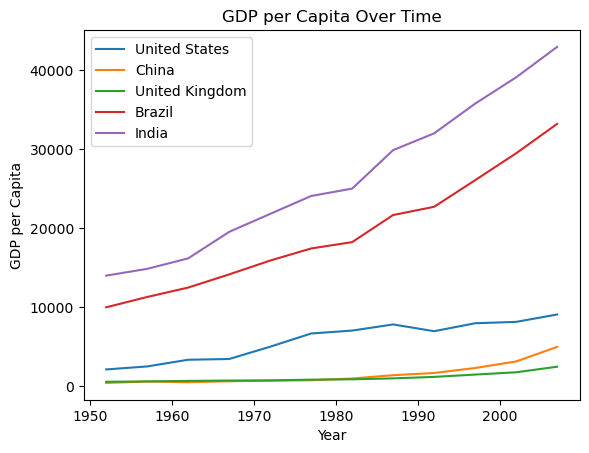

In [ ]:
def time_series(data_source, ct_lst):
    import matplotlib.pyplot as plt

    %matplotlib inline
    import pandas as pd

    gm = pd.read_csv(data_source)

    # a. Select the data for the specified countries
    countries = gm[gm["country"].isin(ct_lst)]
    print(countries.head(8), "\n")

    # b. Create a pivot table where each column is one of the countries and the rows are the years
    p_table = pd.pivot_table(
        countries, values="gdpPercap", index="year", columns="country"
    ).round(decimals=2)
    print(p_table, "\n")

    # c. Create the time series plot of the pivot table
    # plt.----(p_table,)
    # plt.legend(ct_lst)

    p_table.plot(title="GDP per Capita Over Time")
    plt.xlabel("Year")
    plt.ylabel("GDP per Capita")
    plt.legend(ct_lst)
    plt.show()


data_url = "http://bit.ly/2cLzoxH"
countries = ["United States", "China", "United Kingdom", "Brazil", "India"]

time_series(data_url, countries)

### Problem 5:  Filtering
This function will accept three arguments, the data source, the year, and a variable to analyze. The objective of the function is to calculate the percentage of countries for a given year that have below the average of the input variable.

For example, we can use the function to find the percent of countries in 2002 that had below average life expectancy.

In [ ]:
def percent_below(data_source, y, var):
    import numpy as np
    import pandas as pd

    gm = pd.read_csv(data_source)

    # create the dataframe for the selected year
    gm_y = gm[gm["year"] == int(y)].round(decimals=2)
    print(gm_y.head(), "\n")

    # find the mean of the variable (3rd function parameter)
    mean_var = np.mean(gm_y[var])
    print(f"The mean of {var} in the year {y} is {round(mean_var, 2)}\n")
    # print(round(mean_var,2),'\n')

    # Create a column to indicate if each country is below the average
    gm_y["below"] = np.where(gm_y[var] < mean_var, 1, 0).round(decimals=2)
    pct = gm_y["below"].sum() / gm_y["below"].count() * 100

    print(f"{pct:.2f}% of countries have below average {var}")
    # txt="{percent:.2f}% of countries have below average {variable}"
    # print(txt.format(percent=pct, variable=var))


data_url = "http://bit.ly/2cLzoxH"

percent_below(data_url, 2002, "lifeExp")

        country  year         pop continent  lifeExp  gdpPercap
10  Afghanistan  2002  25268405.0      Asia    42.13     726.73
22      Albania  2002   3508512.0    Europe    75.65    4604.21
34      Algeria  2002  31287142.0    Africa    70.99    5288.04
46       Angola  2002  10866106.0    Africa    41.00    2773.29
58    Argentina  2002  38331121.0  Americas    74.34    8797.64 

The mean of lifeExp in the year 2002 is 65.69

40.14% of countries have below average lifeExp


### Exercise: Move to End

Write a function called move_to_end() that moves all elements of one type to the end of the list.

In [1]:
def move_to_end(elements, var):
    beginning = []
    end = []
    new = []
    for i in elements:
        if i==var:
            end.append(i)
        else:
            beginning.append(i)
    new.extend(beginning)
    new.extend(end)
    return new

In [ ]:
# Tests
m1 = move_to_end([1, 3, 2, 4, 4, 1], 1)  # ➞ [3, 2, 4, 4, 1, 1]
print(m1)

m2 = move_to_end([7, 8, 9, 1, 2, 3, 4], 9)  # ➞ [7, 8, 1, 2, 3, 4, 9]
print(m2)

m3 = move_to_end(["a", "a", "a", "b"], "a")  # ➞ ["b", "a", "a", "a"]
print(m3)

[3, 2, 4, 4, 1, 1]
[7, 8, 1, 2, 3, 4, 9]
['b', 'a', 'a', 'a']


### Exercise: Names in Order

Create a function that takes a dictionary of student names and returns a list of student names in alphabetical order. Hint: Take a look at the sorted() method https://www.w3schools.com/python/ref_func_sorted.asp

In [ ]:
def get_student_names(dct):
    lst = []
    for i in dct:
        lst.append(dct[i])
    sorted_list = sorted(lst)
    return sorted_list

In [ ]:
# Tests

g = get_student_names({"Student 1": "Steve", "Student 2": "Becky", "Student 3": "John"})
print(g)  # ➞ ['Becky', 'John', 'Steve']


h = get_student_names(
    {
        "Student 1": "Edison",
        "Student 2": "Sam",
        "Student 3": "Jayden",
        "Student 4": "Zane",
    }
)
print(h)  # ➞ ['Edison', 'Jayden', 'Sam', 'Zane']

['Becky', 'John', 'Steve']
['Edison', 'Jayden', 'Sam', 'Zane']
